In [1]:
import matplotlib.pyplot as plt
import numpy as np

from oscar import OSCAR

%matplotlib inline

<div class="alert alert-info"><h1>Exercise 1: Climate impacts of black carbon aerosols</h1></div>

1. Run a reference simulation under the business as usual RCP8.5 scenario through 2100 for all emissions.  Plot the time series of anthropogenic emissions of black carbon ('EBC').  What happens after year 2010 and into the future?  Why?
2. Plot the time series of black carbon burden (i.e. total mass of black carbon) in the atmosphere as a function of time.  What does it mean if anthropogenic black carbon emissions are decreasing, but the black carbon burden is increasing?

In [2]:
reference = OSCAR(scen_ALL='RCP8.5').run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


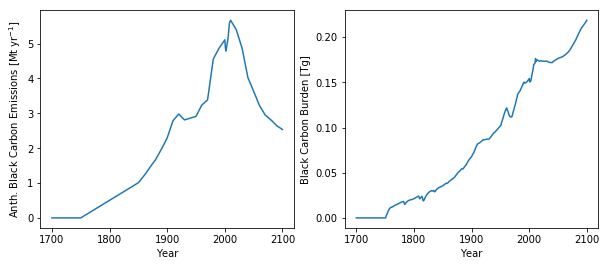

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

year = np.arange(len(reference['D_gst'])) + 1700
ax1.plot(year, reference['EBC']['Total'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Anth. Black Carbon Emissions [Mt yr$^{-1}$]')

ax2.plot(year, reference['D_BC'])
ax2.set_xlabel('Year')
ax2.set_ylabel('Black Carbon Burden [Tg]')

<ol start="2">
<li>Plot the time series of black carbon emissions from biomass burning in the simulation ('D_EBB_BC').  How does it evolve in the future?</li>
</ol>

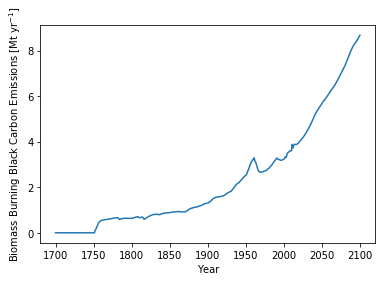

In [4]:
fig, ax = plt.subplots(1, 1)

year = np.arange(len(reference['D_gst'])) + 1700
ax.set_xlabel('Year')
ax.set_ylabel('Biomass Burning Black Carbon Emissions [Mt yr$^{-1}$]')
ax.plot(year, reference['D_EBB_BC']['Total'])

So that's how we get an increasing black carbon burden with decreasing anthropogenic emissions.  Increases in biomass burning emissions more than compensate.

<ol start="3">
<li>What are the present-day climate impacts of anthropogenically emitted black carbon?  Let's investigate by creating and running two simulations:
<ul>
<li>A control experiment using with no emissions for all variables after year 2000.  Note this is the default configuration of OSCAR.</li>
<li>An experiment with no emissions for all variables after year 2000 except black carbon.  For black carbon, prescribe constant emissions (at the year 2000 value from the reference simulation) until year 2100.  Hint: use [`np.ones`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ones.html) scaled by a value to create a time-series of constant emissions to pass to OSCAR.  **Do not specify a value for `mod_DATAscen` in your `OSCAR` configuration step.**</li>
</ul>
</li>
</ol>

In [5]:
bc2000 = reference['EBC']['Total'][300]
bc_emissions = np.ones(101) * bc2000
constant_bc = OSCAR(scen_EBC=bc_emissions).run(2100)
default = OSCAR().run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="4">
<li>Plot the anthropogenic emissions of black carbon in these new cases to verify that you prescribed the emissions properly.</li>
<li>Plot the time series in surface temperature from the control simulation (with no emissions) and the constant black carbon emissions simulation to get a sense for the general climate impact of black carbon.  In terms of surface temperature, what is the overall effect of adding black carbon to the atmosphere?</li>
</ol>

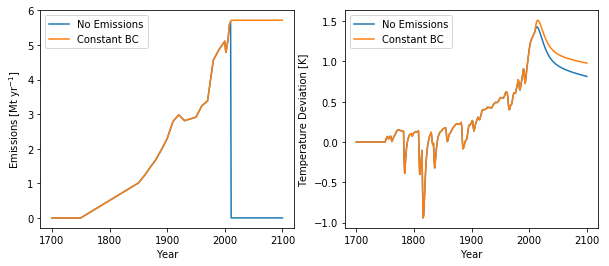

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(10, 4)

year = np.arange(len(reference['D_gst'])) + 1700
ax1.plot(year, default['EBC']['Total'], label='No Emissions')
ax1.plot(year, constant_bc['EBC']['Total'], label='Constant BC')
ax1.legend(loc='upper left')
ax1.set_ylabel('Emissions [Mt yr$^{-1}$]')
ax1.set_xlabel('Year')

ax2.plot(year, default['D_gst'], label='No Emissions')
ax2.plot(year, constant_bc['D_gst'], label='Constant BC')
ax2.legend(loc='upper left')
ax2.set_ylabel('Temperature Deviation [K]')
ax2.set_xlabel('Year')

<ol start="6">
<li>Note that one could also infer the climate impact of black carbon aerosols by their radiative forcing; black carbon aerosols have an impact on climate in multiple ways:
<ul>
<li>**Direct effect ('RF_BC'):** Black carbon aerosols absorb solar radiation in the atmosphere</li>
<li>**Black carbon albedo effect ('RF_BCsnow'):** When black carbon settles on snow in the high latitudes, it darkens the surface (leading to an albedo change; what is the sign of this albedo change?)</li>
<li>**Semi-direct and indirect effect ('RF_cloud'):** Absorption of solar radiation by black carbon within clouds leads to heating; this increases the saturation specific humidity, leading to evaporation, and a decrease in low clouds (the semi-direct effect).  But black carbon also brightens existing clouds by increasing the cloud droplet number concentration (the indirect effect); in practice this effect typically outweighs the semi-direct effect. The quantitative magnitude of these effects of aerosols on clouds are fairly uncertain, however.</li>
</ul>
**OSCAR simulates these effects separately as individual radiative forcings (the names of those variables are in parentheses next to each effect); plot the difference of each of these as a function of time between the constant black carbon emissions simulation and the control simulation.** What are the signs of the different effects?  How do those fit in with your physical intuition?  How important are each of them based on their magnitude?</li>
</ol>

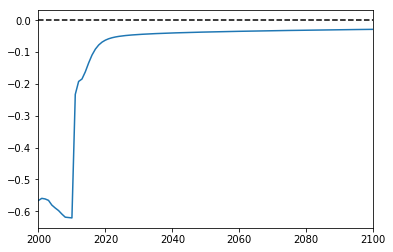

In [7]:
plt.plot(year, default['RF_cloud'])
plt.gca().set_xlim([2000, 2100])
plt.gca().axhline(0.0, ls='--', color='k')

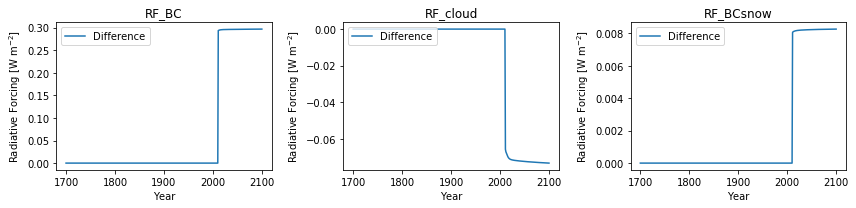

In [8]:
fig, axes = plt.subplots(1, 3, sharey=False)
fig.set_size_inches(12, 3)

year = np.arange(len(reference['D_gst'])) + 1700

variables = ['RF_BC', 'RF_cloud', 'RF_BCsnow']

for ax, var in zip(axes, variables):
    ax.plot(year, constant_bc[var] - default[var], label='Difference')
    ax.legend(loc='upper left')
    ax.set_ylabel('Radiative Forcing [W m$^{-2}$]')
    ax.set_xlabel('Year')
    ax.set_title(var)
fig.tight_layout()

<ol start="7"> 
<li>Using the same procedure that you used last week, estimate the lifetime of black carbon in the atmosphere using the control simulation (where anthropogenic emissions of black carbon promptly stop in year 2000).  How does it compare to that found for the greenhouse gases?  Why is this the case?  How might this impact their effects on climate?</li>
</ol>

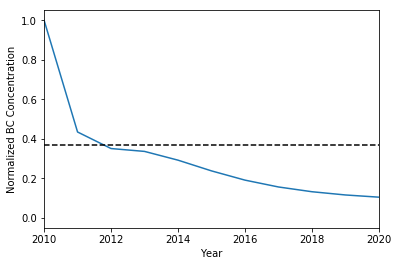

In [9]:
fig, ax = plt.subplots(1, 1)

ax.plot(year, default['D_BC'] / np.max(default['D_BC']))
ax.set_xlim([2010, 2020])
ax.axhline(1. / np.e, ls='--', color='k')
ax.set_ylabel('Normalized BC Concentration')
ax.set_xlabel('Year')

Here it seems less than two years; in practice it's actually even less.  Typical lifetimes of aerosols in the troposphere are on the order of days to weeks (higher in the atmosphere aerosols persist longer before being "deposited" by falling down to the surface).

Where does the reference to the number "e" come from?
--------------------------------------------------
Note that we are assuming that the burden once emission stops can be modeled as an exponential decay with a fixed timescale, $\tau$:
$$ \frac{BC(y)}{BC_{max}} \approx e^{-\frac{y - 2010}{\tau}}.$$
The lifetime (as we have defined it here) is then the time it takes (in number of years) to the point that $-\frac{y - 2010}{\tau} = -1$ (i.e. the point at which $\frac{BC}{BC_{max}}$ drops to $\frac{1}{e}$).

<div class="alert alert-info"><h1>Exercise 2: Switching from coal to natural gas for electricity production </h1></div>

This exercise is motivated by a question in the abstract of Hayoe et al., 2002:
>"Substitution of natural gas for coal is one means of reducing carbon dioxide (CO2) emissions. However, natural gas and coal use also results in emissions of other radiatively active substances including methane (CH4), sulfur dioxide (SO2), a sulfate aerosol precursor, and black carbon (BC) particles. Will switching from coal to gas reduce the net impact of fossil fuel use on global climate?"

RCP8.5 assumes that the energy produced from coal will go from 150 EJ in 2000 to 800 EJ by 2100. In RCP4.5, the energy produced from coal stays around 100 EJ. The aim of this exercise is to estimate the warming associated with coal consumption in RCP8.5 and compare it to the warming if natural gas were used instead. Here, we want to isolate the impact of coal and natural gas without considering all other factors in the scenario. 

1. Using Table 1, compute the emissions of CO2, CH4, SO2, and BC emitted for 1 EJ of energy produced with coal and for 1 EJ of energy produced with natural gas. Be sure to convert to the units used by `OSCAR`. In the end you should obtain emissions in Gt/EJ for CO2 and in Mt/EJ for all other compounds. Note that EJ = $10^{18}$ J.  (These are just individual numbers).

### Table 1: Emissions depending on energy source

| Source       | Coal combustion emissions | Coal combustion emissions range | Natural gas combustion emissions | Natural gas combustion emissions range | 
|--------------|---------------------------|---------------------------------|---|---|
| CO2 [MtC/EJ] |                        25 |                       16.5-29.5 |15 | 14.8-15.3|
| CH4 [MtC/EJ] |                      0.43 |                        0.02-2.0 |1.0 | 0.33-2.2|
| SO2 [MtS/EJ] |                      0.24 |                        0.02-1.2 |0.0003| ?|
| BC [MtC/EJ]  |                      0.04 |                      0.013-0.18 |2.2e-7| ?|

In [10]:
# Emissions are in Mt/EJ to Mt/EJ or Gt/EJ (CO2 only).
# Convert kg to Mt (1 t  = 1000 kg)
# 1 Gt = 1e3 Mt

co2_coal = 25 * 1e-3 # [Mt/EJ] * [Gt/Mt] = [Gt/EJ]
ch4_coal = 0.43 # [Mt/EJ]
so2_coal = 0.24 # [Mt/EJ]
bc_coal = 0.04 # [Mt/EJ]

co2_ngas = 15 * 1e-3 # [Mt/EJ] * [Gt/Mt] = [Gt/EJ]
ch4_ngas = 1.0 # [Mt/EJ]
so2_ngas = 0.0003 # [Mt/EJ]
bc_ngas = 2.2e-7 # [Mt/EJ] 

<ol start="2">
    <li>Run a simulation with the built-in RCP8.5 scenario for all compounds through 2100.</li>
</ol>

In [11]:
enddate=2100

rcp_85 = OSCAR(scen_ALL='RCP8.5', mod_DATAscen='raw').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="3">
    <li>Assuming a linear evolution of coal energy production between 2000 and 2100, compute the per year emissions of CO2, CH4, BC and SO2. Units here should be GtC/y for CO2, MtS/y for SO2 and MtC/y for CH4 and BC. This will be the basis for the "coal" experiment.  Hint: find the start and endpoints, then use [`np.linspace`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html) to generate the linear pattern of emissions; the start is the value of the total emissions for each substance in year 2000 under the RCP8.5 reference case. **Assume the energy production will be 800 EJ in 2100 under the RCP8.5 scenario**.</li>
</ol>

In [12]:
e2000 = 150
EFF_start = e2000 * co2_coal
ECH4_start = e2000 * ch4_coal
ESO2_start = e2000 * so2_coal
EBC_start = e2000 * bc_coal

nyears = len(rcp_85['EBC']['Total'][300:])
e2100 = 800

EFF_final_coal = e2100 * co2_coal
ECH4_final_coal = e2100 * ch4_coal
ESO2_final_coal = e2100 * so2_coal
EBC_final_coal = e2100 * bc_coal

eco2_coal = np.linspace(EFF_start, EFF_final_coal, nyears)
ech4_coal = np.linspace(ECH4_start, ECH4_final_coal, nyears)
eso2_coal = np.linspace(ESO2_start, ESO2_final_coal, nyears)
ebc_coal = np.linspace(EBC_start, EBC_final_coal, nyears)

<ol start="4">
<li>Compute the emissions of CO2, CH4, BC, and SO2 that would be emitted if all coal energy were replaced by natural gas. This will be the basis for the "natural gas" experiment.</li>
</ol>

In [13]:
EFF_start = e2000 * co2_ngas
ECH4_start = e2000 * ch4_ngas
ESO2_start = e2000 * so2_ngas
EBC_start = e2000 * bc_ngas

EFF_final_ngas = e2100 * co2_ngas
ECH4_final_ngas = e2100 * ch4_ngas
ESO2_final_ngas = e2100 * so2_ngas
EBC_final_ngas = e2100 * bc_ngas

eco2_ngas = np.linspace(EFF_start, EFF_final_ngas, nyears)
ech4_ngas = np.linspace(ECH4_start, ECH4_final_ngas, nyears)
eso2_ngas = np.linspace(ESO2_start, ESO2_final_ngas, nyears)
ebc_ngas = np.linspace(EBC_start, EBC_final_ngas, nyears)

<ol start="5">
<li>Run two simulations of `OSCAR`, using the two sets of emissions after 2000 (one for coal emissions, one for natural gas emissions). In each case set all other emissions to zero (i.e. let them stay as their default scenario, which is to stop).  **Use `mod_DATAscen='prescribed'` in your configuration step.**</li>
</ol>

In [14]:
coal_rcp_85 = OSCAR(scen_ECH4=ech4_coal, scen_EFF=eco2_coal, 
                    scen_ESO2=eso2_coal, scen_EBC=ebc_coal, mod_DATAscen='prescribed').run(enddate)
ngas_rcp_85 = OSCAR(scen_ECH4=ech4_ngas, scen_EFF=eco2_ngas, 
                    scen_ESO2=eso2_ngas, scen_EBC=ebc_ngas, mod_DATAscen='prescribed').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


<ol start="6">
<li>Plot and compare the temperature and emissions of CO2, CH4, SO2 and BC in both experiments. Verify that your emissions were prescribed properly.  Discuss.</li>
</ol>

(1900, 2100)

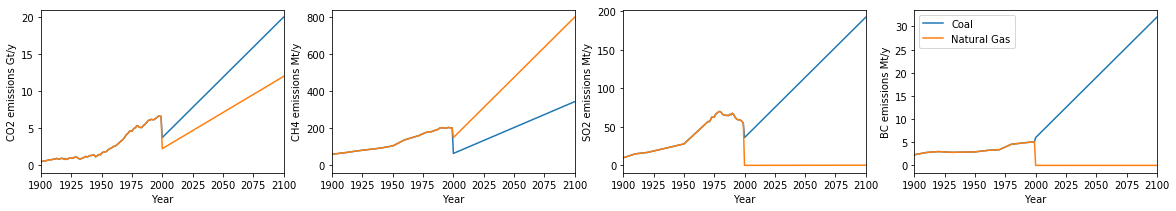

In [15]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4)
fig.set_size_inches(20, 3)
year = np.arange(len(coal_rcp_85['D_gst'])) + 1700

ax1.plot(year, coal_rcp_85['EFF']['Total'], label='Coal')
ax1.plot(year, ngas_rcp_85['EFF']['Total'], label='Natural Gas')
ax1.set_ylabel('CO2 emissions Gt/y')
ax1.set_xlabel('Year')
ax1.set_xlim([1900, 2100])

ax2.plot(year, coal_rcp_85['ECH4']['Total'], label='Coal')
ax2.plot(year, ngas_rcp_85['ECH4']['Total'], label='Natural Gas')
ax2.set_ylabel('CH4 emissions Mt/y')
ax2.set_xlabel('Year')
ax2.set_xlim([1900, 2100])

ax3.plot(year, coal_rcp_85['ESO2']['Total'], label='Coal')
ax3.plot(year, ngas_rcp_85['ESO2']['Total'], label='Natural Gas')
ax3.set_ylabel('SO2 emissions Mt/y')
ax3.set_xlabel('Year')
ax3.set_xlim([1900, 2100])

ax4.plot(year, coal_rcp_85['EBC']['Total'], label='Coal')
ax4.plot(year, ngas_rcp_85['EBC']['Total'], label='Natural Gas')
ax4.legend(loc='upper left')
ax4.set_ylabel('BC emissions Mt/y')
ax4.set_xlabel('Year')
ax4.set_xlim([1900, 2100])

(2000, 2100)

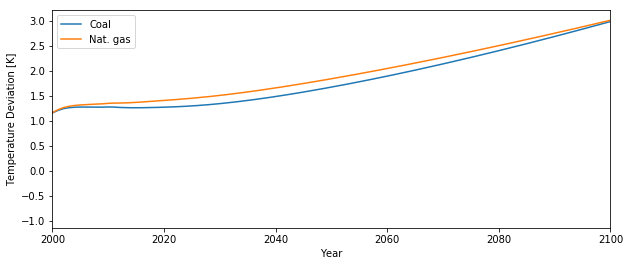

In [16]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(10, 4)

year = np.arange(len(rcp_85['D_gst'])) + 1700
ax1.plot(year, coal_rcp_85['D_gst'], label='Coal')
ax1.plot(year, ngas_rcp_85['D_gst'], label='Nat. gas')
ax1.legend(loc='upper left')
ax1.set_ylabel('Temperature Deviation [K]')
ax1.set_xlabel('Year')
ax1.set_xlim([2000, 2100])

<ol start="7">
<li>We want to decompose the warming into the contributions from CO2, CH4, SO2 and BC in both cases. Run experiments isolating the impact of each of the 4 compounds in the coal and in the natural gas cases. Similarly to the previous exercise, you also need to run a "control" experiment with no emissions to remove the background warming (if you plot the warming in that control experiment you'll see that it is not zero). Plot the warming induced by each compound. Discuss the compensation between coal and natural gas cases.</li>
</ol>

In [17]:
control = OSCAR().run(2100)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


In [18]:
coal_ch4 = OSCAR(scen_ECH4=ech4_coal,
                 mod_DATAscen='prescribed').run(enddate)
coal_co2 = OSCAR(scen_EFF=eco2_coal,  
                 mod_DATAscen='prescribed').run(enddate)
coal_so2 = OSCAR(scen_ESO2=eso2_coal, 
                 mod_DATAscen='prescribed').run(enddate)
coal_bc = OSCAR(scen_EBC=ebc_coal, 
                mod_DATAscen='prescribed').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


In [19]:
ngas_ch4 = OSCAR(scen_ECH4=ech4_ngas,
               mod_DATAscen='prescribed').run(enddate)
ngas_co2 = OSCAR(scen_EFF=eco2_ngas,  
               mod_DATAscen='prescribed').run(enddate)
ngas_so2 = OSCAR(scen_ESO2=eso2_ngas, 
               mod_DATAscen='prescribed').run(enddate)
ngas_bc = OSCAR(scen_EBC=ebc_ngas, 
              mod_DATAscen='prescribed').run(enddate)

LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING
LOADING: DRIVERS
LOADING: PARAMETERS
FORMATING


(-2, 3)

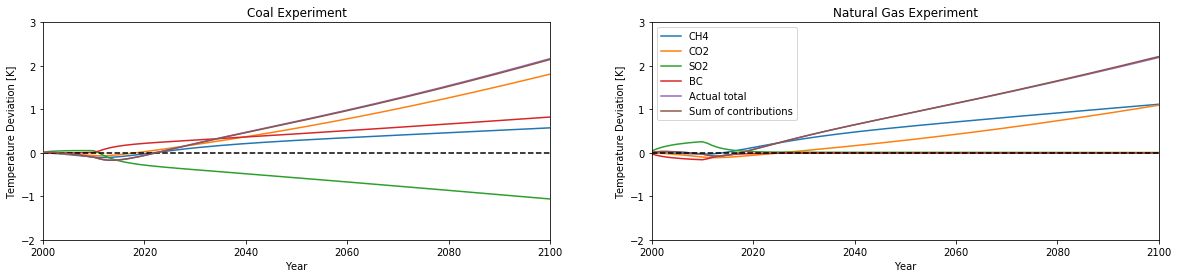

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 4)
year = np.arange(len(coal_ch4['D_gst'])) + 1700

ax1.plot(year, coal_ch4['D_gst'] - control['D_gst'], label='CH4')
ax1.plot(year, coal_co2['D_gst'] - control['D_gst'], label='CO2')
ax1.plot(year, coal_so2['D_gst'] - control['D_gst'], label='SO2')
ax1.plot(year, coal_bc['D_gst'] - control['D_gst'], label='BC')
ax1.plot(year, coal_rcp_85['D_gst'] - control['D_gst'], label='Actual total')

total = coal_ch4['D_gst'] + coal_co2['D_gst'] + coal_so2['D_gst'] + coal_bc['D_gst']

ax1.plot(year, total - 4 * control['D_gst'], label='Sum of contributions', zorder=10)

ax1.axhline(0.0, color='black', ls='--')
ax1.set_ylabel('Temperature Deviation [K]')
ax1.set_xlabel('Year')
ax1.set_xlim([2000, 2100])
ax1.set_title('Coal Experiment')
ax1.set_ylim([-2, 3])

ax2.plot(year, ngas_ch4['D_gst'] - control['D_gst'], label='CH4')
ax2.plot(year, ngas_co2['D_gst'] - control['D_gst'], label='CO2')
ax2.plot(year, ngas_so2['D_gst'] - control['D_gst'], label='SO2')
ax2.plot(year, ngas_bc['D_gst'] - control['D_gst'], label='BC')
ax2.plot(year, ngas_rcp_85['D_gst'] - control['D_gst'], label='Actual total')

total = ngas_ch4['D_gst'] + ngas_co2['D_gst'] + ngas_so2['D_gst'] + ngas_bc['D_gst']

ax2.plot(year, total - 4 * control['D_gst'], label='Sum of contributions')
ax2.axhline(0.0, color='black', ls='--')
ax2.legend(loc='upper left')
ax2.set_ylabel('Temperature Deviation [K]')
ax2.set_xlabel('Year')
ax2.set_title('Natural Gas Experiment')
ax2.set_xlim([2000, 2100])
ax2.set_ylim([-2, 3])

References
----------

Hayhoe, K. et al. 2002. Substitution of Natural Gas for Coal: Climatic Effects of Utility Sector Emissions. Climatic Change 54, 107–139. doi:10.1023/A:1015737505552

Lueken, R. et al. 2016. The climate and health effects of a USA switch from coal to gas electricity generation. Energy 109, 1160–1166. doi:10.1016/j.energy.2016.03.078

van Vuuren et al. 2017. Energy, land-use and greenhouse gas emissions trajectories under a green growth paradigm. Global Environmental Change 42, 237–250. doi:10.1016/j.gloenvcha.2016.05.008